In [26]:
#Imports.
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Takes UKDALE Mains CSV and reads as a pandas Dataframe.
df = read_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\UKDALE Mains Data\h1-5_2014_july.csv', header=[0,1,2])
df.head()

physical_quantity              power                                      
               type           apparent             active           reactive
              index Unnamed: 1_level_2 Unnamed: 2_level_2 Unnamed: 3_level_2
0      1.404169e+09             155.14             104.32         114.829254
1      1.404169e+09             157.34             105.67         116.574980
2      1.404169e+09             155.81             104.63         115.452675
3      1.404169e+09             156.35             105.06         115.791710
4      1.404169e+09             155.32             104.39         115.008840

In [3]:
data = df.values

In [84]:
print(data)

[[1.40416920e+09 1.55140000e+02 1.04320000e+02 1.14829254e+02]
 [1.40416920e+09 1.57340000e+02 1.05670000e+02 1.16574980e+02]
 [1.40416920e+09 1.55810000e+02 1.04630000e+02 1.15452675e+02]
 ...
 [1.40684760e+09 5.06890000e+02 3.15580000e+02 3.96669600e+02]
 [1.40684760e+09 5.06600000e+02 3.15210000e+02 3.96593260e+02]
 [1.40684760e+09 5.07690000e+02 3.15920000e+02 3.97421300e+02]]


In [5]:
X, y = data[:,:-1], data[:,-1]
print(X.shape, y.shape)

(5318429, 3) (5318429,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3563347, 3) (1755082, 3) (3563347,) (1755082,)


In [7]:
model = RandomForestRegressor(n_estimators = 25, random_state=15)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=15)

In [8]:
yhat = model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test, yhat)
print('R2: %.4f' % r2)

MAE: 0.299
R2: 0.9997


In [10]:
print(y_test)
print(yhat)

[365.05112 426.05838 110.1309  ... 422.54037 196.9096  170.48993]
[365.022236  426.0658768 110.1283038 ... 422.5490968 196.8771316
 170.4872076]


In [61]:
dfXvar = pd.DataFrame(X_test)
scatteract = pd.DataFrame()
scatteract['active'] = dfXvar[2]
scatteract['reactive'] = y_test
scatterpred = pd.DataFrame()
scatterpred['active'] = dfXvar[2]
scatterpred['reactive'] = yhat

In [62]:
scatteract.head(10)

,active,reactive
0,510.30,365.051120
1,376.22,426.058380
2,93.58,110.130900
3,615.05,204.352780
4,249.09,151.857070
5,97.15,116.041680
6,179.74,114.663730
7,90.60,111.772514
8,159.68,114.106460
9,258.36,121.984886


In [79]:
actsample = scatterpred.sample(25000, random_state = 1)
activeact, reactiveact = actsample['active'], actsample['reactive']
predsample = scatterpred.sample(25000, random_state=1)
activepred, reactivepred = predsample['active'], predsample['reactive']

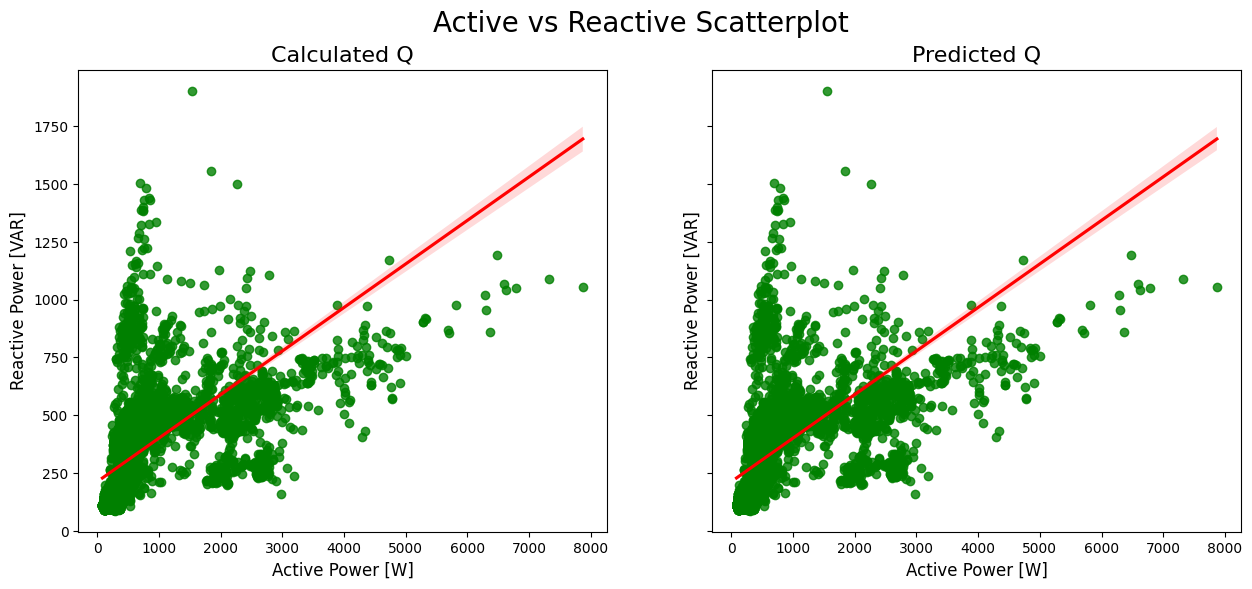

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6), sharey= True)

fig.suptitle('Active vs Reactive Scatterplot',fontsize = 20)
sns.regplot(x=activeact, y= reactiveact, scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax = ax[0])
sns.regplot(x=activepred, y= reactivepred, scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax = ax[1])

ax[0].set_xlabel('Active Power [W]',fontsize = 12)
ax[1].set_xlabel('Active Power [W]',fontsize = 12)
ax[0].set_ylabel('Reactive Power [VAR]',fontsize = 12)
ax[1].set_ylabel('Reactive Power [VAR]',fontsize = 12)
ax[0].set_title('Calculated Q',fontsize = 16)
ax[1].set_title('Predicted Q',fontsize = 16)

plt.show()

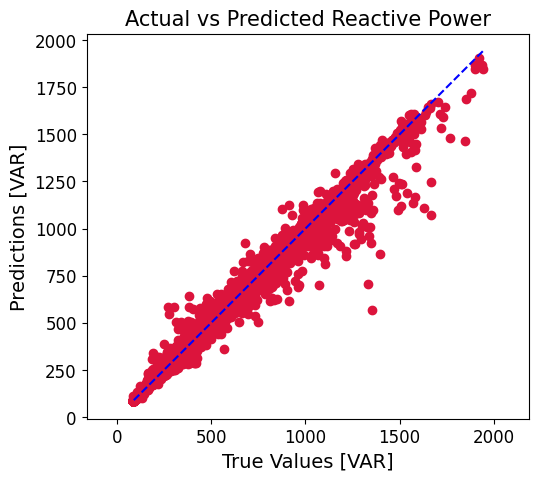

In [86]:
plt.figure(figsize=(5.71,5))
a = plt.scatter(y_test, yhat, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
b = plt.plot([p1, p2], [p1, p2], 'b--')

plt.xlabel('True Values [VAR]', fontsize=14)
plt.ylabel('Predictions [VAR]', fontsize=14)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title('Actual vs Predicted Reactive Power', fontsize = 15)
plt.axis('equal')
plt.show()

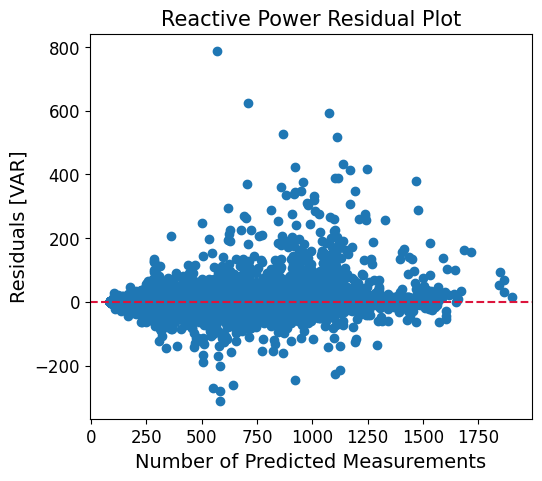

In [87]:
residuals = y_test - yhat
plt.figure(figsize=(5.71,5))
plt.scatter(yhat, residuals)
plt.xlabel('Number of Predicted Measurements', fontsize=14)
plt.ylabel('Residuals [VAR]', fontsize=14)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title('Reactive Power Residual Plot', fontsize=15)
plt.axhline(y=0, color='crimson', linestyle='--')
plt.show()